In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gst-pred/Train_60 2/Instructions.txt
/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv
/kaggle/input/gst-pred/Train_60 2/correlation.PNG
/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv
/kaggle/input/gst-pred/Train_60 2/SHA_256.txt
/kaggle/input/gst-pred/Train_60 2/checksum.py
/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv
/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv


In [94]:
df = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv')
df_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv')

In [95]:
y_train=pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv')
y_test =pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv')

In [96]:
data = pd.merge(df, y_train, on='ID')
data.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 24 columns]

In [97]:
data1 = pd.merge(df_test, y_test, on='ID')
data1.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1  0.001351   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         0  0.001351   
2 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         1  0.001351   
4 -1.855728       NaN -0.407939 -0.015434 -0.774979  ...         1       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       0.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [98]:
# Set a threshold for acceptable missing value ratio (e.g., 20%)
missing_value_threshold = 0.3

# Calculate the ratio of missing values for each feature
missing_ratios = df.isnull().mean()

# Filter out features with too many missing values
selected_features = missing_ratios[missing_ratios <= missing_value_threshold].index

print("Selected Features (based on Missing Value Ratio):", selected_features)

Selected Features (based on Missing Value Ratio): Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21'],
      dtype='object')


In [99]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                     'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 
                     'Column12', 'Column13', 'Column15', 'Column16', 
                     'Column17', 'Column18', 'Column19', 'Column20', 'Column21']

# Select these columns from the dataframe
X_train = df[columns_to_select]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column15  768677 non-null  float64
 15  Column16  785133 non-null  float64
 16  Column17  785133 non-null  int64  
 17  Column18  785133 non-null  float64
 18  Column19  785133 non-null  int64  
 19  Column20  785133 non-null  int64  
 20  Colu

In [100]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                     'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 
                     'Column12', 'Column13', 'Column15', 'Column16', 
                     'Column17', 'Column18', 'Column19', 'Column20', 'Column21','target']

# Select these columns from the dataframe
data = data[columns_to_select]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column15  768677 non-null  float64
 15  Column16  785133 non-null  float64
 16  Column17  785133 non-null  int64  
 17  Column18  785133 non-null  float64
 18  Column19  785133 non-null  int64  
 19  Column20  785133 non-null  int64  
 20  Colu

In [101]:
data = data.drop('ID', axis=1)

In [102]:
data_train = data.interpolate(method='polynomial', order=2, inplace=False)# method1 
data_train_1 = data.interpolate(method='linear', inplace=False)#method2
# List of columns with missing values (from your provided data)
#method3
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']

# Loop through each column and fill NaN values with the median grouped by 'target'
for column in columns_with_null:
    data[column] = data[column].fillna(data.groupby('target')[column].transform('median'))


In [103]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# X: Categorical feature DataFrame, y: Target
X = data.drop('target', axis=1)
y = data['target']

# Chi-square requires non-negative values, so we scale X to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform Chi-Squared test
chi_scores = chi2(X_scaled, y)

# Create a DataFrame to display Chi-Squared scores and p-values
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi_scores[0], 'p-value': chi_scores[1]})

# Sort features by Chi-Squared score
chi2_df.sort_values(by='Chi-Squared Score', ascending=False, inplace=True)

print(chi2_df)

     Feature  Chi-Squared Score        p-value
17  Column19       51523.430086   0.000000e+00
16  Column18       43469.972948   0.000000e+00
18  Column20       14283.723065   0.000000e+00
19  Column21       11119.433043   0.000000e+00
1    Column1       10546.764827   0.000000e+00
11  Column12        8246.596427   0.000000e+00
4    Column4        5869.401828   0.000000e+00
9   Column10        5636.640155   0.000000e+00
12  Column13        4695.834732   0.000000e+00
10  Column11        4043.198011   0.000000e+00
14  Column16        3026.768124   0.000000e+00
15  Column17        2420.625189   0.000000e+00
3    Column3        1645.441308   0.000000e+00
2    Column2        1536.367975   0.000000e+00
6    Column6        1315.363300  5.182940e-288
0    Column0         556.338009  5.262957e-123
8    Column8          59.528571   1.205315e-14
7    Column7           6.152906   1.311964e-02
5    Column5           0.176263   6.746047e-01
13  Column15           0.000044   9.946958e-01


In [104]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# X: Categorical feature DataFrame, y: Target
X = data_train.drop('target', axis=1)
y = data_train['target']

# Chi-square requires non-negative values, so we scale X to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform Chi-Squared test
chi_scores = chi2(X_scaled, y)

# Create a DataFrame to display Chi-Squared scores and p-values
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi_scores[0], 'p-value': chi_scores[1]})

# Sort features by Chi-Squared score
chi2_df.sort_values(by='Chi-Squared Score', ascending=False, inplace=True)

print(chi2_df)

     Feature  Chi-Squared Score       p-value
17  Column19       51523.430086  0.000000e+00
16  Column18       43469.972948  0.000000e+00
18  Column20       14283.723065  0.000000e+00
19  Column21       11119.433043  0.000000e+00
1    Column1       10546.764827  0.000000e+00
11  Column12        8246.596427  0.000000e+00
9   Column10        5636.640155  0.000000e+00
12  Column13        4695.834732  0.000000e+00
10  Column11        4043.198011  0.000000e+00
14  Column16        3026.768124  0.000000e+00
15  Column17        2420.625189  0.000000e+00
2    Column2        1536.367975  0.000000e+00
6    Column6         198.126942  5.352842e-45
0    Column0         196.289271  1.347824e-44
4    Column4          59.772465  1.064827e-14
3    Column3          44.789295  2.194190e-11
8    Column8          12.889333  3.304601e-04
7    Column7           6.152906  1.311964e-02
13  Column15           0.000044  9.946811e-01
5    Column5           0.000012  9.971805e-01


In [105]:
# low_relevance_columns = ['Column0', 'Column8', 'Column7', 'Column5', 'Column15']

# # Remove these columns from the dataframe
# data = data.drop(columns=low_relevance_columns)
# data_train_1 = data_train_1.drop(columns=low_relevance_columns)
# # Check the remaining columns
# print("Remaining columns:", data.columns)

In [106]:
# low_relevance_columns = ['Column3', 'Column8', 'Column7', 'Column5', 'Column15']

# # Remove these columns from the dataframe
# # data = data.drop(columns=low_relevance_columns)
# data_train = data_train.drop(columns=low_relevance_columns)
# # Check the remaining columns
# print("Remaining columns:", data_train.columns)

In [107]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 
                     'Column5', 'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 
                     'Column12', 'Column13', 'Column15', 'Column16', 
                     'Column17', 'Column18', 'Column19', 'Column20', 'Column21','target']

# Select these columns from the dataframe
data1 = data1[columns_to_select]

# Remove the 'ID' column
data1 = data1.drop('ID', axis=1)

In [108]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   261710 non-null  float64
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column3   219478 non-null  float64
 4   Column4   219002 non-null  float64
 5   Column5   206053 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   261712 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column10  261712 non-null  int64  
 10  Column11  261712 non-null  int64  
 11  Column12  261712 non-null  int64  
 12  Column13  261712 non-null  int64  
 13  Column15  256227 non-null  float64
 14  Column16  261712 non-null  float64
 15  Column17  261712 non-null  int64  
 16  Column18  261712 non-null  float64
 17  Column19  261712 non-null  int64  
 18  Column20  261712 non-null  int64  
 19  Column21  261712 non-null  int64  
 20  targ

In [109]:
data_test = data1.interpolate(method='polynomial', order=2, inplace=False)
data_test_1 = data1.interpolate(method='linear', inplace=False)
# List of columns with null values
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']
# columns_with_null = ['Column0', 'Column3', 'Column4', 'Column6', 'Column8', 'Column15']

# Step 1: Store the median values for target 0 and target 1
median_values_target_0 = data[data['target'] == 0][columns_with_null].median()
median_values_target_1 = data[data['target'] == 1][columns_with_null].median()

# Step 2: Replace NaN values in data1 based on target value
for column in columns_with_null:
    # If target is 0, fill NaN values with median from target 0
    data1.loc[data1['target'] == 0, column] = data1.loc[data1['target'] == 0, column].fillna(median_values_target_0[column])
    
    # If target is 1, fill NaN values with median from target 1
    data1.loc[data1['target'] == 1, column] = data1.loc[data1['target'] == 1, column].fillna(median_values_target_1[column])


In [110]:
low_relevance_columns = ['Column0', 'Column8', 'Column7', 'Column5', 'Column15']

# Remove these columns from the dataframe
data = data.drop(columns=low_relevance_columns)
data_train_1 = data_train_1.drop(columns=low_relevance_columns)
data1 = data1.drop(columns=low_relevance_columns)
data_test_1 = data_test_1.drop(columns=low_relevance_columns)
# Check the remaining columns
print("Remaining columns:", data.columns)

Remaining columns: Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column6', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'target'],
      dtype='object')


In [111]:
low_relevance_columns = ['Column3', 'Column8', 'Column7', 'Column5', 'Column15']

# Remove these columns from the dataframe
# data = data.drop(columns=low_relevance_columns)
data_train = data_train.drop(columns=low_relevance_columns)
data_test = data_test.drop(columns=low_relevance_columns)
# Check the remaining columns
print("Remaining columns:", data_train.columns)

Remaining columns: Index(['Column0', 'Column1', 'Column2', 'Column4', 'Column6', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'target'],
      dtype='object')


Accuracy: 0.9639
Balanced Accuracy: 0.9800
ROC-AUC Score: 0.9897
Model 1 Precision: 0.7232
Model 1 Recall: 0.9999
Model 1 F1 Score: 0.8393

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.72      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712

Confusion Matrix:
[[227590   9444]
 [     2  24676]]


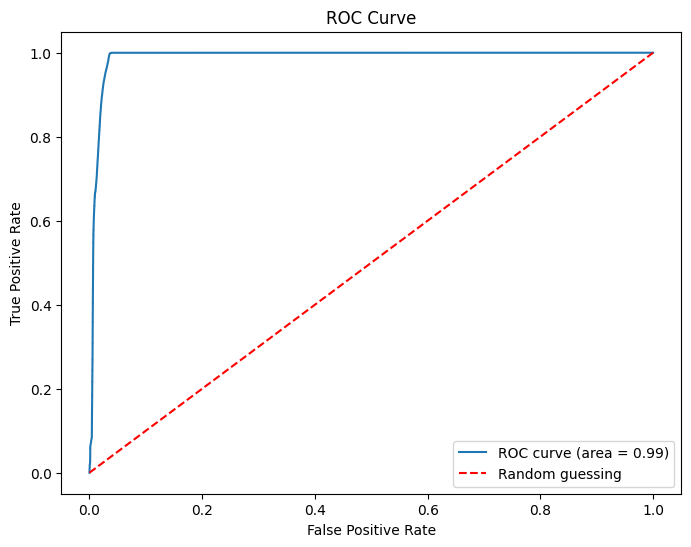

In [112]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Load the reduced dataset (final_df)
# Note: Assuming 'final_df' contains the PCA-transformed features and the 'target' column

# Define features and target
X_train = data.drop(columns=['target'])  # Features (all PCA components)
y_train = data['target']  # Target variable
X_test = data1.drop(columns=['target'])  # Features (all PCA components)
y_test = data1['target']  # Target variable'
X_train_1 = data_train.drop(columns=['target'])  # Features (all PCA components)
y_train_1 = data_train['target']  # Target variable
X_test_1 = data_test.drop(columns=['target'])  # Features (all PCA components)
y_test_1 = data_test['target']  # Target variable
X_train_2 = data_train_1.drop(columns=['target'])  # Features (all PCA components)
y_train_2 = data_train_1['target']  # Target variable
X_test_2 = data_test_1.drop(columns=['target'])  # Features (all PCA components)
y_test_2 = data_test_1['target']  # Target variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)  # max_iter is set high to ensure convergence
logreg1 = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg2 = LogisticRegression(class_weight='balanced', max_iter=1000)
# Train the model
logreg.fit(X_train, y_train)
logreg1.fit(X_train_1, y_train_1)
logreg2.fit(X_train_2, y_train_2)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])  # Using predicted probabilities for ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])  # Use predicted probabilities

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy (logreg1): 0.9643
Balanced Accuracy (logreg1): 0.9802
ROC-AUC Score (logreg1): 0.9890
Model 2 Precision: 0.7254
Model 2 Recall: 0.9998
Model 2 F1 Score: 0.8408

Classification Report (logreg1):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.73      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712

Confusion Matrix (logreg1):
[[227693   9341]
 [     5  24673]]


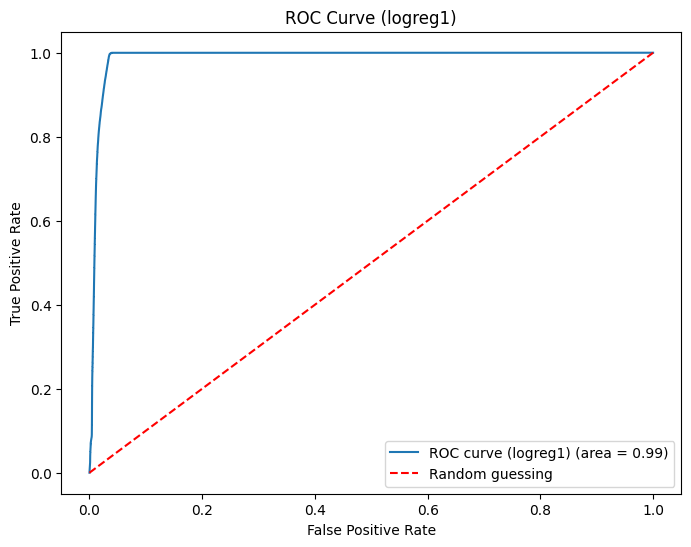

In [113]:
# Evaluate logreg1 on X_test_1 and y_test_1
y_pred_1 = logreg1.predict(X_test_1)

# Evaluate the model
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
balanced_accuracy_1 = balanced_accuracy_score(y_test_1, y_pred_1)
roc_auc_1 = roc_auc_score(y_test_1, logreg1.predict_proba(X_test_1)[:, 1])# Using predicted probabilities for ROC-AUC
precision_1 = precision_score(y_test_1, y_pred_1)
recall_1 = recall_score(y_test_1, y_pred_1)
f1_1 = f1_score(y_test_1, y_pred_1)

print(f"Accuracy (logreg1): {accuracy_1:.4f}")
print(f"Balanced Accuracy (logreg1): {balanced_accuracy_1:.4f}")
print(f"ROC-AUC Score (logreg1): {roc_auc_1:.4f}")
print(f"Model 2 Precision: {precision_1:.4f}")
print(f"Model 2 Recall: {recall_1:.4f}")
print(f"Model 2 F1 Score: {f1_1:.4f}")


# Detailed classification report
print("\nClassification Report (logreg1):")
print(classification_report(y_test_1, y_pred_1))

# Confusion matrix
print("Confusion Matrix (logreg1):")
print(confusion_matrix(y_test_1, y_pred_1))

# ROC Curve for logreg1
fpr_1, tpr_1, _ = roc_curve(y_test_1, logreg1.predict_proba(X_test_1)[:, 1])  # Use predicted probabilities

# Plot ROC Curve for logreg1
plt.figure(figsize=(8,6))
plt.plot(fpr_1, tpr_1, label=f'ROC curve (logreg1) (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (logreg1)')
plt.legend(loc="lower right")
plt.show()


In [114]:
# Evaluate logreg2 on X_test_2 and y_test_2
y_pred_2 = logreg2.predict(X_test_2)

# Evaluate the model
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
balanced_accuracy_2 = balanced_accuracy_score(y_test_2, y_pred_2)
roc_auc_2 = roc_auc_score(y_test_2, logreg2.predict_proba(X_test_2)[:, 1])# Using predicted probabilities for ROC-AUC
precision_2 = precision_score(y_test_2, y_pred_2)
recall_2 = recall_score(y_test_2, y_pred_2)
f1_2 = f1_score(y_test_2, y_pred_2)

print(f"Accuracy (logreg2): {accuracy_2:.4f}")
print(f"Balanced Accuracy (logreg2): {balanced_accuracy_2:.4f}")
print(f"ROC-AUC Score (logreg2): {roc_auc_2:.4f}")
print(f"Model 3 Precision: {precision_2:.4f}")
print(f"Model 3 Recall: {recall_2:.4f}")
print(f"Model 3 F1 Score: {f1_2:.4f}")

# Detailed classification report
print("\nClassification Report (logreg2):")
print(classification_report(y_test_2, y_pred_2))

# Confusion matrix
print("Confusion Matrix (logreg2):")
print(confusion_matrix(y_test_2, y_pred_2))

# ROC Curve for logreg2
fpr_2, tpr_2, _ = roc_curve(y_test_2, logreg2.predict_proba(X_test_2)[:, 1])  # Use predicted probabilities

# Plot ROC Curve for logreg2
plt.figure(figsize=(8,6))
plt.plot(fpr_2, tpr_2, label=f'ROC curve (logreg2) (area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (logreg2)')
plt.legend(loc="lower right")
plt.show()


Accuracy (logreg2): 0.9636
Balanced Accuracy (logreg2): 0.9799
ROC-AUC Score (logreg2): 0.9891
Model 3 Precision: 0.7214
Model 3 Recall: 1.0000
Model 3 F1 Score: 0.8382

Classification Report (logreg2):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.72      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712

Confusion Matrix (logreg2):
[[227505   9529]
 [     0  24678]]


Model 1 Accuracy: 0.9798
Model 1 Balanced Accuracy: 0.9461
Model 1 ROC-AUC Score: 0.9963
Model 1 Precision: 0.8839
Model 1 Recall: 0.9046
Model 1 F1 Score: 0.8941

Classification Report (Model 1):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    237034
           1       0.88      0.90      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.94      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix (Model 1):
[[234101   2933]
 [  2355  22323]]


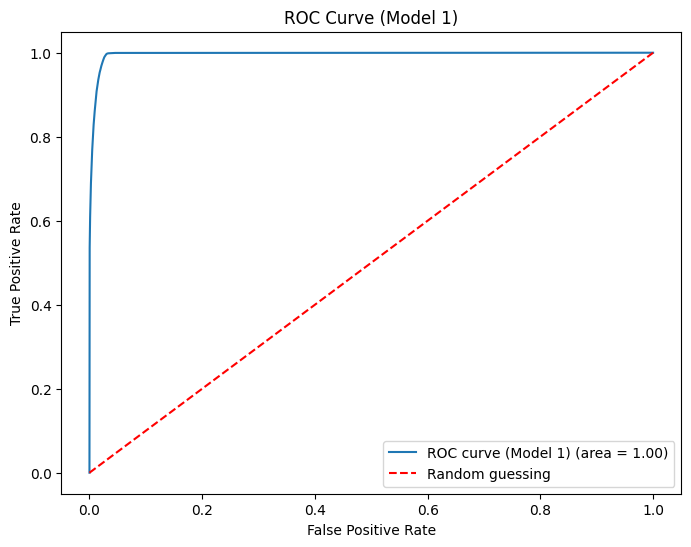

Model 2 Accuracy: 0.9738
Model 2 Balanced Accuracy: 0.9402
Model 2 ROC-AUC Score: 0.9927
Model 2 Precision: 0.8359
Model 2 Recall: 0.8988
Model 2 F1 Score: 0.8662

Classification Report (Model 2):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.90      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.91      0.94      0.93    261712
weighted avg       0.97      0.97      0.97    261712

Confusion Matrix (Model 2):
[[232681   4353]
 [  2497  22181]]


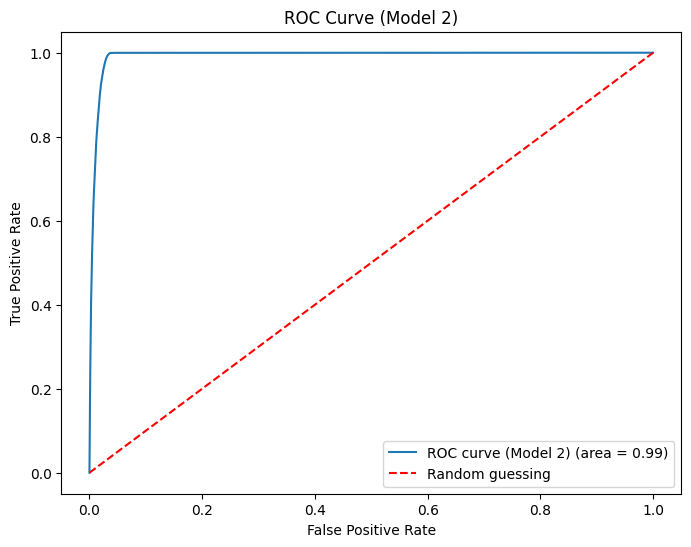

Model 3 Accuracy: 0.9732
Model 3 Balanced Accuracy: 0.9369
Model 3 ROC-AUC Score: 0.9924
Model 3 Precision: 0.8351
Model 3 Recall: 0.8921
Model 3 F1 Score: 0.8627

Classification Report (Model 3):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.89      0.86     24678

    accuracy                           0.97    261712
   macro avg       0.91      0.94      0.92    261712
weighted avg       0.97      0.97      0.97    261712

Confusion Matrix (Model 3):
[[232687   4347]
 [  2663  22015]]


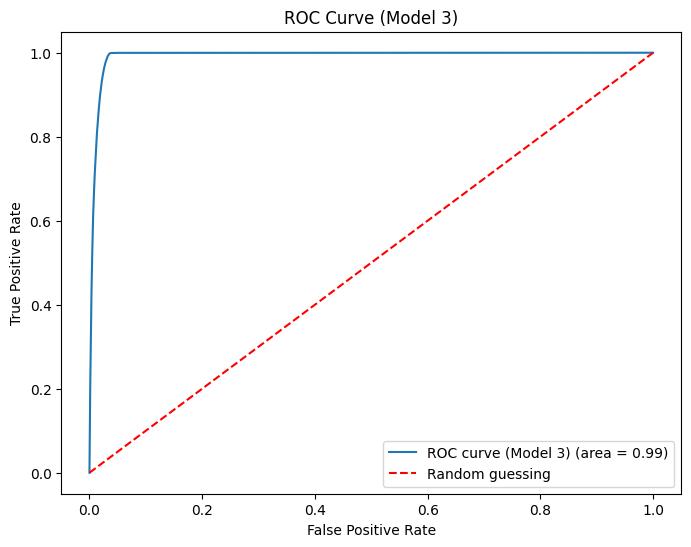

In [115]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Define Random Forest models
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model1 = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model2 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
rf_model1.fit(X_train_1, y_train_1)
rf_model2.fit(X_train_2, y_train_2)

# Make predictions on the test sets
y_pred = rf_model.predict(X_test)
y_pred_1 = rf_model1.predict(X_test_1)
y_pred_2 = rf_model2.predict(X_test_2)

# Evaluate rf_model (Model 1)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")
print("\nClassification Report (Model 1):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix (Model 1):")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for rf_model
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot ROC Curve for rf_model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (Model 1) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Model 1)')
plt.legend(loc="lower right")
plt.show()

# Evaluate rf_model1 (Model 2)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
balanced_accuracy_1 = balanced_accuracy_score(y_test_1, y_pred_1)
roc_auc_1 = roc_auc_score(y_test_1, rf_model1.predict_proba(X_test_1)[:, 1])
precision_1 = precision_score(y_test_1, y_pred_1)
recall_1 = recall_score(y_test_1, y_pred_1)
f1_1 = f1_score(y_test_1, y_pred_1)

print(f"Model 2 Accuracy: {accuracy_1:.4f}")
print(f"Model 2 Balanced Accuracy: {balanced_accuracy_1:.4f}")
print(f"Model 2 ROC-AUC Score: {roc_auc_1:.4f}")
print(f"Model 2 Precision: {precision_1:.4f}")
print(f"Model 2 Recall: {recall_1:.4f}")
print(f"Model 2 F1 Score: {f1_1:.4f}")
print("\nClassification Report (Model 2):")
print(classification_report(y_test_1, y_pred_1))
print("Confusion Matrix (Model 2):")
print(confusion_matrix(y_test_1, y_pred_1))

# ROC Curve for rf_model1
fpr_1, tpr_1, _ = roc_curve(y_test_1, rf_model1.predict_proba(X_test_1)[:, 1])

# Plot ROC Curve for rf_model1
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label=f'ROC curve (Model 2) (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Model 2)')
plt.legend(loc="lower right")
plt.show()

# Evaluate rf_model2 (Model 3)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
balanced_accuracy_2 = balanced_accuracy_score(y_test_2, y_pred_2)
roc_auc_2 = roc_auc_score(y_test_2, rf_model2.predict_proba(X_test_2)[:, 1])
precision_2 = precision_score(y_test_2, y_pred_2)
recall_2 = recall_score(y_test_2, y_pred_2)
f1_2 = f1_score(y_test_2, y_pred_2)

print(f"Model 3 Accuracy: {accuracy_2:.4f}")
print(f"Model 3 Balanced Accuracy: {balanced_accuracy_2:.4f}")
print(f"Model 3 ROC-AUC Score: {roc_auc_2:.4f}")
print(f"Model 3 Precision: {precision_2:.4f}")
print(f"Model 3 Recall: {recall_2:.4f}")
print(f"Model 3 F1 Score: {f1_2:.4f}")
print("\nClassification Report (Model 3):")
print(classification_report(y_test_2, y_pred_2))
print("Confusion Matrix (Model 3):")
print(confusion_matrix(y_test_2, y_pred_2))

# ROC Curve for rf_model2
fpr_2, tpr_2, _ = roc_curve(y_test_2, rf_model2.predict_proba(X_test_2)[:, 1])

# Plot ROC Curve for rf_model2
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'ROC curve (Model 3) (area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Model 3)')
plt.legend(loc="lower right")
plt.show()



Model 1 (XGBoost):
Accuracy: 0.9813
Balanced Accuracy: 0.9540
ROC-AUC Score: 0.9970
Precision: 0.8856
Recall: 0.9204
F1 Score: 0.9027

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    237034
           1       0.89      0.92      0.90     24678

    accuracy                           0.98    261712
   macro avg       0.94      0.95      0.95    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[234100   2934]
 [  1964  22714]]


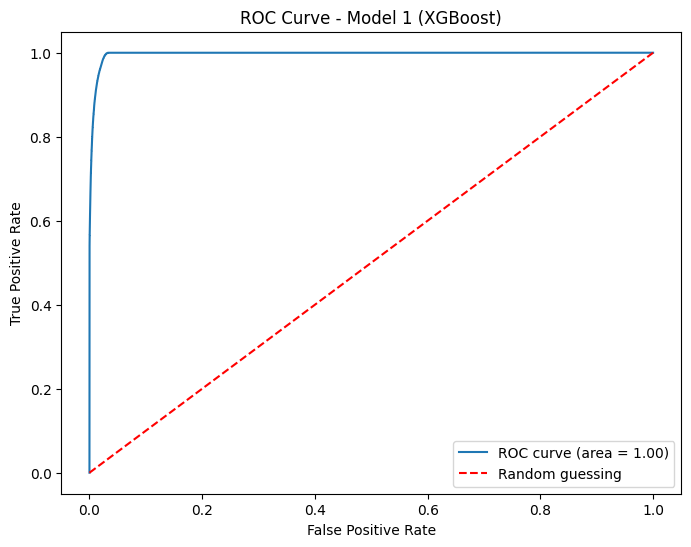


Model 2 (XGBoost):
Accuracy: 0.9755
Balanced Accuracy: 0.9547
ROC-AUC Score: 0.9939
Precision: 0.8315
Recall: 0.9289
F1 Score: 0.8775

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232389   4645]
 [  1754  22924]]


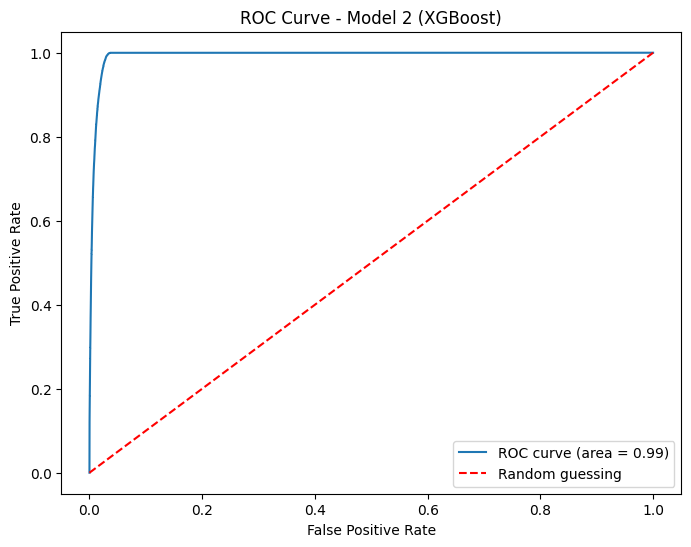


Model 3 (XGBoost):
Accuracy: 0.9757
Balanced Accuracy: 0.9535
ROC-AUC Score: 0.9937
Precision: 0.8345
Recall: 0.9261
F1 Score: 0.8779

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232501   4533]
 [  1824  22854]]


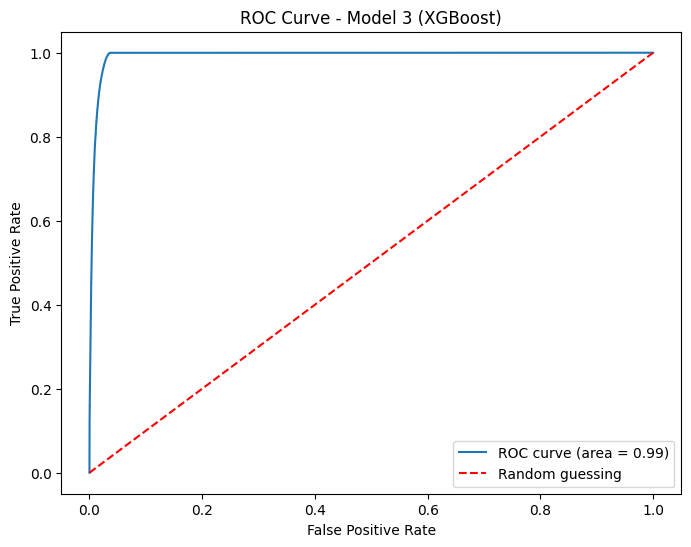

In [116]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Scaling the data using StandardScaler
scaler = StandardScaler()

# Apply scaling to all datasets (X_train, X_train_1, X_train_2 and corresponding test sets)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_1_scaled = scaler.fit_transform(X_train_1)
X_test_1_scaled = scaler.transform(X_test_1)

X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

# Initialize XGBoost models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the models
xgb_model.fit(X_train_scaled, y_train)
xgb_model1.fit(X_train_1_scaled, y_train_1)
xgb_model2.fit(X_train_2_scaled, y_train_2)

# Make predictions on the test sets
y_pred = xgb_model.predict(X_test_scaled)
y_pred1 = xgb_model1.predict(X_test_1_scaled)
y_pred2 = xgb_model2.predict(X_test_2_scaled)

# Evaluate model 1
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel 1 (XGBoost):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for model 1
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 2
accuracy1 = accuracy_score(y_test_1, y_pred1)
balanced_accuracy1 = balanced_accuracy_score(y_test_1, y_pred1)
roc_auc1 = roc_auc_score(y_test_1, xgb_model1.predict_proba(X_test_1_scaled)[:, 1])
precision1 = precision_score(y_test_1, y_pred1)
recall1 = recall_score(y_test_1, y_pred1)
f1_1 = f1_score(y_test_1, y_pred1)

print("\nModel 2 (XGBoost):")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy1:.4f}")
print(f"ROC-AUC Score: {roc_auc1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred1))

# ROC Curve for model 2
fpr1, tpr1, _ = roc_curve(y_test_1, xgb_model1.predict_proba(X_test_1_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 2 (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 3
accuracy2 = accuracy_score(y_test_2, y_pred2)
balanced_accuracy2 = balanced_accuracy_score(y_test_2, y_pred2)
roc_auc2 = roc_auc_score(y_test_2, xgb_model2.predict_proba(X_test_2_scaled)[:, 1])
precision2 = precision_score(y_test_2, y_pred2)
recall2 = recall_score(y_test_2, y_pred2)
f1_2 = f1_score(y_test_2, y_pred2)

print("\nModel 3 (XGBoost):")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy2:.4f}")
print(f"ROC-AUC Score: {roc_auc2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred2))

# ROC Curve for model 3
fpr2, tpr2, _ = roc_curve(y_test_2, xgb_model2.predict_proba(X_test_2_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 3 (XGBoost)')
plt.legend(loc="lower right")
plt.show()



Model 1 (CatBoost):
Accuracy: 0.9813
Balanced Accuracy: 0.9522
ROC-AUC Score: 0.9970
Precision: 0.8888
Recall: 0.9164
F1 Score: 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    237034
           1       0.89      0.92      0.90     24678

    accuracy                           0.98    261712
   macro avg       0.94      0.95      0.95    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[234206   2828]
 [  2064  22614]]


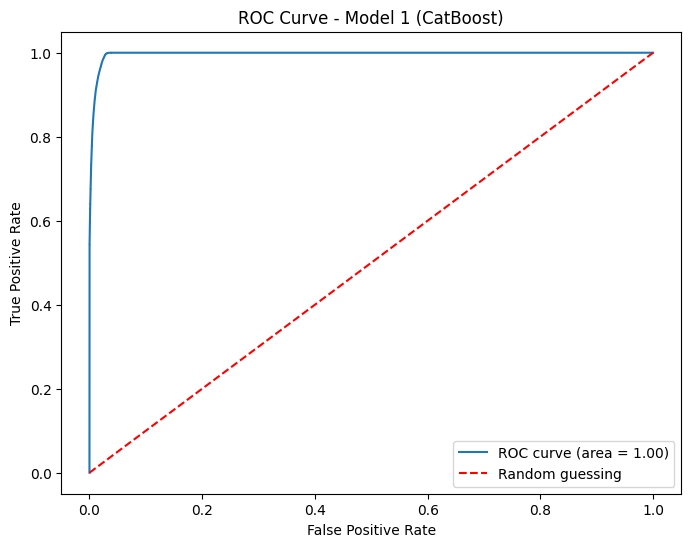


Model 2 (CatBoost):
Accuracy: 0.9755
Balanced Accuracy: 0.9529
ROC-AUC Score: 0.9938
Precision: 0.8338
Recall: 0.9250
F1 Score: 0.8771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232485   4549]
 [  1850  22828]]


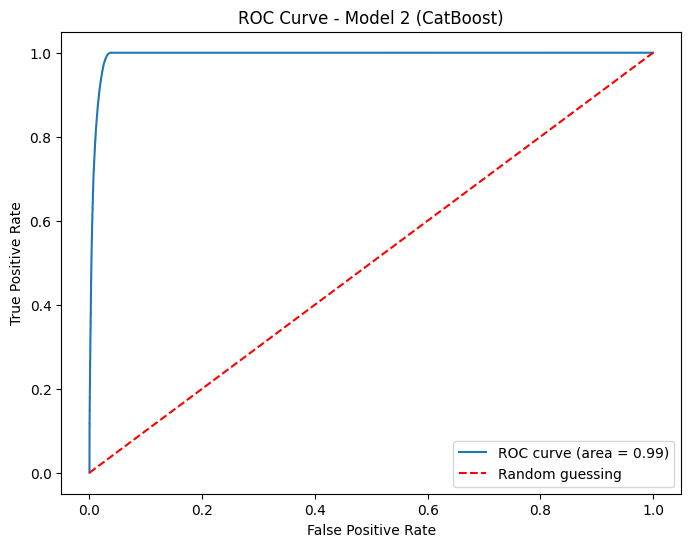


Model 3 (CatBoost):
Accuracy: 0.9757
Balanced Accuracy: 0.9512
ROC-AUC Score: 0.9937
Precision: 0.8373
Recall: 0.9211
F1 Score: 0.8772

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232617   4417]
 [  1948  22730]]


In [117]:
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Initialize CatBoost models
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model1 = CatBoostClassifier(verbose=0, random_state=42)
cat_model2 = CatBoostClassifier(verbose=0, random_state=42)

# Train the models
cat_model.fit(X_train, y_train)
cat_model1.fit(X_train_1, y_train_1)
cat_model2.fit(X_train_2, y_train_2)

# Make predictions on the test sets
y_pred = cat_model.predict(X_test)
y_pred1 = cat_model1.predict(X_test_1)
y_pred2 = cat_model2.predict(X_test_2)

# Evaluate model 1
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel 1 (CatBoost):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for model 1
fpr, tpr, _ = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (CatBoost)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 2
accuracy1 = accuracy_score(y_test_1, y_pred1)
balanced_accuracy1 = balanced_accuracy_score(y_test_1, y_pred1)
roc_auc1 = roc_auc_score(y_test_1, cat_model1.predict_proba(X_test_1)[:, 1])
precision1 = precision_score(y_test_1, y_pred1)
recall1 = recall_score(y_test_1, y_pred1)
f1_1 = f1_score(y_test_1, y_pred1)

print("\nModel 2 (CatBoost):")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy1:.4f}")
print(f"ROC-AUC Score: {roc_auc1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred1))

# ROC Curve for model 2
fpr1, tpr1, _ = roc_curve(y_test_1, cat_model1.predict_proba(X_test_1)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 2 (CatBoost)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 3
accuracy2 = accuracy_score(y_test_2, y_pred2)
balanced_accuracy2 = balanced_accuracy_score(y_test_2, y_pred2)
roc_auc2 = roc_auc_score(y_test_2, cat_model2.predict_proba(X_test_2)[:, 1])
precision2 = precision_score(y_test_2, y_pred2)
recall2 = recall_score(y_test_2, y_pred2)
f1_2 = f1_score(y_test_2, y_pred2)

print("\nModel 3 (CatBoost):")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy2:.4f}")
print(f"ROC-AUC Score: {roc_auc2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred2))

# ROC Curve for model 3
fpr2, tpr2, _ = roc_curve(y_test_2, cat_model2.predict_proba(X_test_2)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 3 (CatBoost)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302
[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.134767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 15
[LightGBM] [Inf


Model 2 (LightGBM):
Accuracy: 0.9757
Balanced Accuracy: 0.9588
ROC-AUC Score: 0.9939
Precision: 0.8273
Recall: 0.9380
F1 Score: 0.8792

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232202   4832]
 [  1529  23149]]


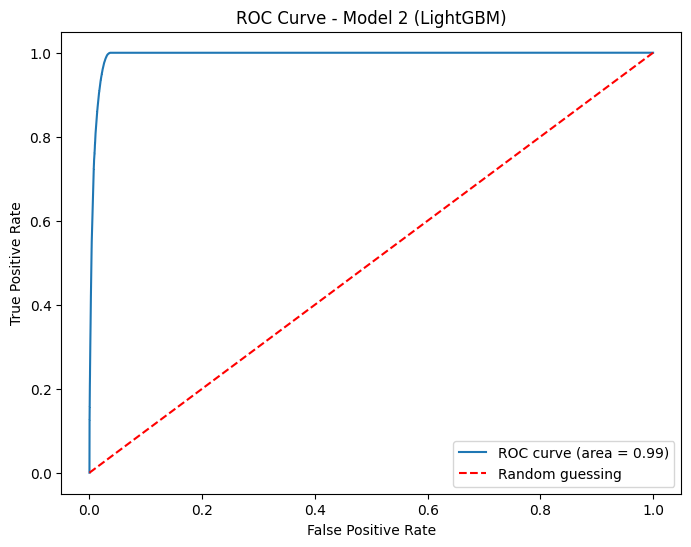


Model 3 (LightGBM):
Accuracy: 0.9757
Balanced Accuracy: 0.9579
ROC-AUC Score: 0.9938
Precision: 0.8283
Recall: 0.9361
F1 Score: 0.8789

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232247   4787]
 [  1578  23100]]


In [119]:
import lightgbm as lgb
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Initialize LightGBM models
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model1 = lgb.LGBMClassifier(random_state=42)
lgb_model2 = lgb.LGBMClassifier(random_state=42)

# Train the models
lgb_model.fit(X_train_scaled, y_train)
lgb_model1.fit(X_train_1_scaled, y_train_1)
lgb_model2.fit(X_train_2_scaled, y_train_2)

# Make predictions on the test sets
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_lgb1 = lgb_model1.predict(X_test_1_scaled)
y_pred_lgb2 = lgb_model2.predict(X_test_2_scaled)

# Evaluate model 1
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print("\nModel 1 (LightGBM):")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_lgb:.4f}")
print(f"ROC-AUC Score: {roc_auc_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

# ROC Curve for model 1
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve (area = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (LightGBM)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 2
accuracy_lgb1 = accuracy_score(y_test_1, y_pred_lgb1)
balanced_accuracy_lgb1 = balanced_accuracy_score(y_test_1, y_pred_lgb1)
roc_auc_lgb1 = roc_auc_score(y_test_1, lgb_model1.predict_proba(X_test_1_scaled)[:, 1])
precision_lgb1 = precision_score(y_test_1, y_pred_lgb1)
recall_lgb1 = recall_score(y_test_1, y_pred_lgb1)
f1_lgb1 = f1_score(y_test_1, y_pred_lgb1)

print("\nModel 2 (LightGBM):")
print(f"Accuracy: {accuracy_lgb1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_lgb1:.4f}")
print(f"ROC-AUC Score: {roc_auc_lgb1:.4f}")
print(f"Precision: {precision_lgb1:.4f}")
print(f"Recall: {recall_lgb1:.4f}")
print(f"F1 Score: {f1_lgb1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred_lgb1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_lgb1))

# ROC Curve for model 2
fpr_lgb1, tpr_lgb1, _ = roc_curve(y_test_1, lgb_model1.predict_proba(X_test_1_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb1, tpr_lgb1, label=f'ROC curve (area = {roc_auc_lgb1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 2 (LightGBM)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 3
accuracy_lgb2 = accuracy_score(y_test_2, y_pred_lgb2)
balanced_accuracy_lgb2 = balanced_accuracy_score(y_test_2, y_pred_lgb2)
roc_auc_lgb2 = roc_auc_score(y_test_2, lgb_model2.predict_proba(X_test_2_scaled)[:, 1])
precision_lgb2 = precision_score(y_test_2, y_pred_lgb2)
recall_lgb2 = recall_score(y_test_2, y_pred_lgb2)
f1_lgb2 = f1_score(y_test_2, y_pred_lgb2)

print("\nModel 3 (LightGBM):")
print(f"Accuracy: {accuracy_lgb2:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_lgb2:.4f}")
print(f"ROC-AUC Score: {roc_auc_lgb2:.4f}")
print(f"Precision: {precision_lgb2:.4f}")
print(f"Recall: {recall_lgb2:.4f}")
print(f"F1 Score: {f1_lgb2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_lgb2))
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred_lgb2))

# ROC Curve for model 3
fpr_lgb2, tpr_lgb2, _ = roc_curve(y_test_2, lgb_model2.predict_proba(X_test_2_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb2, tpr_lgb2, label=f'ROC curve (area = {roc_auc_lgb2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 3 (LightGBM)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Initialize KNN models with n_neighbors set to 3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model2 = KNeighborsClassifier(n_neighbors=3)

# Train the models
knn_model.fit(X_train_scaled, y_train)
knn_model1.fit(X_train_1_scaled, y_train_1)
knn_model2.fit(X_train_2_scaled, y_train_2)

# Make predictions on the test sets
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_knn1 = knn_model1.predict(X_test_1_scaled)
y_pred_knn2 = knn_model2.predict(X_test_2_scaled)

# Evaluate model 1
accuracy_knn = accuracy_score(y_test, y_pred_knn)
balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nModel 1 (KNN):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_knn:.4f}")
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# ROC Curve for model 1
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (KNN)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 2
accuracy_knn1 = accuracy_score(y_test_1, y_pred_knn1)
balanced_accuracy_knn1 = balanced_accuracy_score(y_test_1, y_pred_knn1)
roc_auc_knn1 = roc_auc_score(y_test_1, knn_model1.predict_proba(X_test_1_scaled)[:, 1])
precision_knn1 = precision_score(y_test_1, y_pred_knn1)
recall_knn1 = recall_score(y_test_1, y_pred_knn1)
f1_knn1 = f1_score(y_test_1, y_pred_knn1)

print("\nModel 2 (KNN):")
print(f"Accuracy: {accuracy_knn1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_knn1:.4f}")
print(f"ROC-AUC Score: {roc_auc_knn1:.4f}")
print(f"Precision: {precision_knn1:.4f}")
print(f"Recall: {recall_knn1:.4f}")
print(f"F1 Score: {f1_knn1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred_knn1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_1, y_pred_knn1))

# ROC Curve for model 2
fpr_knn1, tpr_knn1, _ = roc_curve(y_test_1, knn_model1.predict_proba(X_test_1_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn1, tpr_knn1, label=f'ROC curve (area = {roc_auc_knn1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 2 (KNN)')
plt.legend(loc="lower right")
plt.show()

# Evaluate model 3
accuracy_knn2 = accuracy_score(y_test_2, y_pred_knn2)
balanced_accuracy_knn2 = balanced_accuracy_score(y_test_2, y_pred_knn2)
roc_auc_knn2 = roc_auc_score(y_test_2, knn_model2.predict_proba(X_test_2_scaled)[:, 1])
precision_knn2 = precision_score(y_test_2, y_pred_knn2)
recall_knn2 = recall_score(y_test_2, y_pred_knn2)
f1_knn2 = f1_score(y_test_2, y_pred_knn2)

print("\nModel 3 (KNN):")
print(f"Accuracy: {accuracy_knn2:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_knn2:.4f}")
print(f"ROC-AUC Score: {roc_auc_knn2:.4f}")
print(f"Precision: {precision_knn2:.4f}")
print(f"Recall: {recall_knn2:.4f}")
print(f"F1 Score: {f1_knn2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_knn2))
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred_knn2))

# ROC Curve for model 3
fpr_knn2, tpr_knn2, _ = roc_curve(y_test_2, knn_model2.predict_proba(X_test_2_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn2, tpr_knn2, label=f'ROC curve (area = {roc_auc_knn2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 3 (KNN)')
plt.legend(loc="lower right")
plt.show()



Model 1 (KNN):
Accuracy: 0.9767
Balanced Accuracy: 0.9373
ROC-AUC Score: 0.9790
Precision: 0.8677
Recall: 0.8886
F1 Score: 0.8781

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    237034
           1       0.87      0.89      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.93      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[233691   3343]
 [  2748  21930]]


In [ ]:
data_train_1.info()